**傳統機器學習法**

In [0]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
y = df['Outcome'].values
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [0]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [18]:
train_X.shape

(614, 8)

In [19]:
tsst_X.shape

(154, 8)

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
predicted = clf.predict(tsst_X)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y,predicted)

0.7402597402597403

In [23]:
confusion_matrix(test_y, predicted)

array([[74, 25],
       [15, 40]])

In [24]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predicted2 = clf2.predict(test_X)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y,predicted2)

0.7597402597402597

In [27]:
confusion_matrix(test_y,predicted2)

array([[83, 16],
       [21, 34]])

**深度學習法**

In [0]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/diabetes.csv')

In [0]:
y = df['Outcome'].values
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [0]:
# starndard = (x - mean) / std
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
train_scaled_X, test_scaled_X, train_y, test_y = train_test_split(scaled_X,y, test_size = 0.2, random_state = 42)

In [33]:
train_scaled_X.shape

(614, 8)

In [0]:
n_hidden_1 = 4 
n_hidden_2 = 4 
n_input    = 8  

training_epochs = 100
batch_size = 16

In [36]:

import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense
model = keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

W0626 05:56:30.067168 140489606432640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0626 05:56:30.113950 140489606432640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0626 05:56:30.121908 140489606432640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [39]:
history = model.fit(train_scaled_X, train_y,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(test_scaled_X, test_y))

Train on 614 samples, validate on 154 samples
Epoch 1/100
614/614 [==============================] - 0s 88us/step - loss: 0.4637 - acc: 0.7704 - val_loss: 0.5422 - val_acc: 0.7143
Epoch 2/100
614/614 [==============================] - 0s 77us/step - loss: 0.4634 - acc: 0.7736 - val_loss: 0.5411 - val_acc: 0.7143
Epoch 3/100
614/614 [==============================] - 0s 72us/step - loss: 0.4634 - acc: 0.7752 - val_loss: 0.5408 - val_acc: 0.7143
Epoch 4/100
614/614 [==============================] - 0s 72us/step - loss: 0.4633 - acc: 0.7769 - val_loss: 0.5409 - val_acc: 0.7143
Epoch 5/100
614/614 [==============================] - 0s 71us/step - loss: 0.4632 - acc: 0.7736 - val_loss: 0.5405 - val_acc: 0.7143
Epoch 6/100
614/614 [==============================] - 0s 71us/step - loss: 0.4629 - acc: 0.7769 - val_loss: 0.5407 - val_acc: 0.7143
Epoch 7/100
614/614 [==============================] - 0s 70us/step - loss: 0.4628 - acc: 0.7752 - val_loss: 0.5406 - val_acc: 0.7143
Epoch 8/100
614/

In [0]:
predicted3 = model.predict(test_scaled_X)

In [0]:
predicted3 = (predicted3.flatten() > 0.5 ).astype(int)

In [48]:
accuracy_score(test_y, predicted3)

0.7077922077922078

In [49]:
confusion_matrix(test_y, predicted3)

array([[72, 27],
       [18, 37]])

**選擇優化器**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [0]:
def tarinProcess(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    history = classifier.fit(train_scaled_X, train_y,
                        batch_size=16,
                        epochs=100,
                        verbose=0,
                        validation_data=(test_scaled_X, test_y))
    return history

In [0]:
history1 = tarinProcess('sgd')

In [0]:
history2 = tarinProcess('RMSprop')

In [0]:
history3 = tarinProcess('Adagrad')

In [0]:
history4 = tarinProcess('Adadelta')

In [0]:

history5 = tarinProcess('Adam')

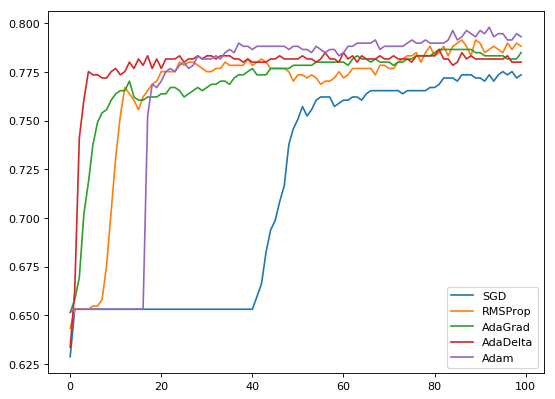

In [59]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history1.epoch, history1.history['acc'], label='SGD')
plt.plot(history2.epoch, history2.history['acc'], label='RMSProp')
plt.plot(history3.epoch, history3.history['acc'], label='AdaGrad')
plt.plot(history4.epoch, history4.history['acc'], label='AdaDelta')
plt.plot(history5.epoch, history5.history['acc'], label='Adam')
plt.legend()
plt.show()